In [110]:
from keras.datasets import mnist 
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [111]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [112]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                36928     
__________

In [116]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_images, train_labels, epochs = 5, batch_size = 64)
history2=model.fit(test_images, test_labels, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1705 - acc: 0.9463
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0472 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0332 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0245 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0197 - acc: 0.9942
Epoch 1/5
10000/10000 [==============================] - 1s 86us/step - loss: 0.0319 - acc: 0.9902
Epoch 2/5
10000/10000 [==============================] - 1s 87us/step - loss: 0.0134 - acc: 0.9949
Epoch 3/5
10000/10000 [==============================] - 1s 88us/step - loss: 0.0063 - acc: 0.9975
Epoch 4/5
10000/10000 [==============================] - 1s 87us/step - loss: 0.0032 - acc: 0.9991
Epoch 5/5
10000/10000 [==============================] - 1s 86us/step - loss: 0.0040 - acc: 0.9988


In [117]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/step


In [118]:
test_acc

0.9997

In [119]:
score=model.evaluate(test_images, test_labels)
score

10000/10000 [==============================] - 1s 60us/step


[0.0008023811585844669, 0.9997]

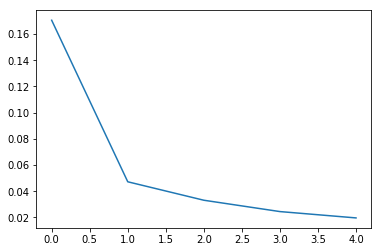

In [120]:
#Courbe de fonction de coût d'apprentissage en fonction des épochs
history.history['loss']
plt.plot(history.history['loss'])
plt.show()

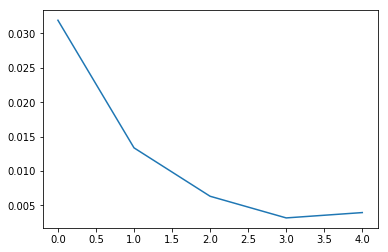

In [121]:
#Courbe de fonction de coût de test en fonction des épochs
history2.history['loss']
plt.plot(history2.history['loss'])
plt.show()